---
bibliography: circadian.bib
author:
  - name: Kevin Hannay 
    url: https://khannay.github.io
    affiliation: University of Michigan, Arcascope Inc
citation: true
---

In [ ]:
#| hide 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
#| hide
from circadian import *

# Circadian

> Tools for the simulation and analysis of circadian rhythms

## Install

```sh
pip install circadian
```

## Quick start

The below shows how to simulate a shift worker schedule for three models and make an actogram plot

In [ ]:
from circadian.plots import Actogram
from circadian.models import *
from circadian.lights import Light

import matplotlib.pyplot as plt
import numpy as np

days_night = 3
days_day = 2
slam_shift = Light.ShiftWorkLight(lux = 300.0, 
                                  dayson=days_night, 
                                  daysoff=days_day)
ts = np.arange(0, 24*30,0.10)
light_values = slam_shift(ts, repeat_period=24*(days_night+days_day))

f_model = Forger99Model()
spm_model = Hannay19()
tpm_model = Hannay19TP()
kj_model = KronauerJewett()
initial_conditions_forger = f_model.initial_conditions_loop(ts, light_est=light_values, num_loops=1)
initial_conditions_kj = kj_model.initial_conditions_loop(ts, light_est=light_values, num_loops=1)
initial_conditions_spm = spm_model.initial_conditions_loop(ts, light_est=light_values, num_loops=1)
initial_conditions_tpm = tpm_model.initial_conditions_loop(ts, light_est=light_values, num_loops=1)

Integrate the models using a explicit RK4 scheme

In [ ]:

trajectory = f_model(ts=ts, light_est=light_values, state = initial_conditions_forger)
trajectory_kj = kj_model(ts=ts, light_est=light_values, state = initial_conditions_kj)
trajectory_spm = spm_model(ts=ts, light_est=light_values, state = initial_conditions_spm)
trajectory_tpm = tpm_model(ts=ts, light_est=light_values, state = initial_conditions_tpm)


Find the dlmos (Dim Light Melatonin Onset) a experimental measurement of circadian phase

In [ ]:

dlmo_f = f_model.dlmos(trajectory)
dlmo_kj = kj_model.dlmos(trajectory)
dlmo_spm = spm_model.dlmos(trajectory_spm)
dlmo_tpm = tpm_model.dlmos(trajectory_tpm)


Now let's make an actogram plot of the light schedule with the DLMOs shown for the simulated shiftworker

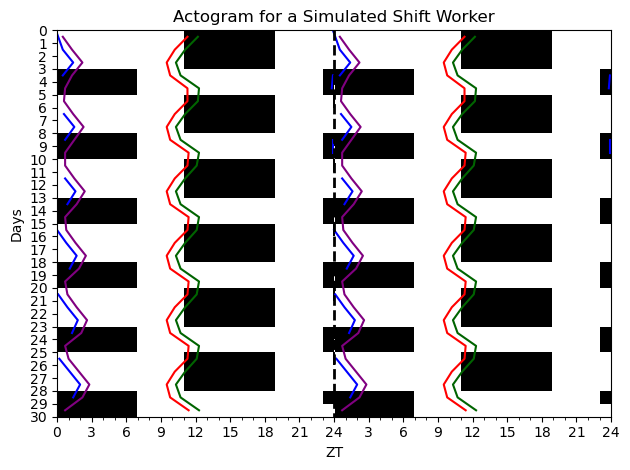

In [ ]:


acto = Actogram(ts, light_vals=light_values, opacity=1.0, smooth=False)
acto.plot_phasemarker(dlmo_f, color='blue', label= "DLMO Forger99")
acto.plot_phasemarker(dlmo_spm, color='darkgreen', label = "DLMO SPM")
acto.plot_phasemarker(dlmo_tpm, color='red', label = "DLMO TPM" )
acto.plot_phasemarker(dlmo_kj, color='purple', label = "DLMO TPM" )
plt.title("Actogram for a Simulated Shift Worker")
plt.tight_layout()
plt.show()
